In [ ]:
import numpy as np

# 加载事件数据
"""
该数据集时间戳是0-300多ms
"""
path = r'D:\PycharmProjects\EventSR-dataset\dataset\N-MNIST\SR_Test\HR\0\0.npy'
# path = r"D:\PycharmProjects\EventSR-dataset\dataset\N-MNIST\ResConv5\HRPre\0\0.npy"
events = np.load(path)

# 检查加载后的数据结构
print(events.shape)
print(events)


(3878, 4)
[[  0  12   9   0]
 [  1   5  12   0]
 [  1  13   9   0]
 ...
 [303   2   2   1]
 [304  23  33   1]
 [305  14  26   0]]


(3878, 4)
Total Events: 3878, Attributes per Event: 4

First Event:
[ 0 12  9  0]
Timestamp: 0.0000000000
x: 12
y: 9
Polarity: 0


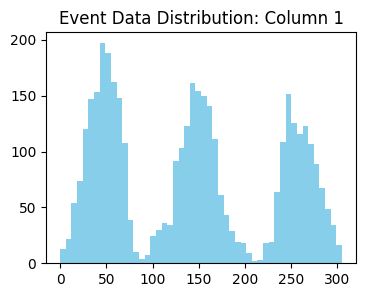

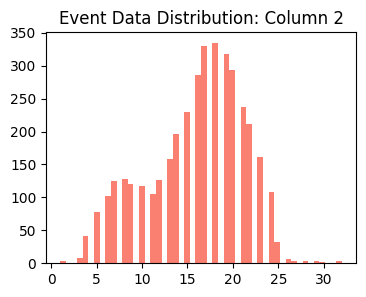

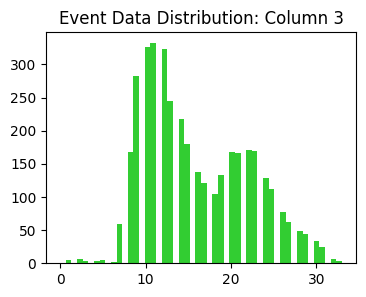

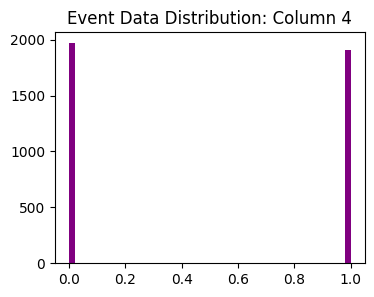

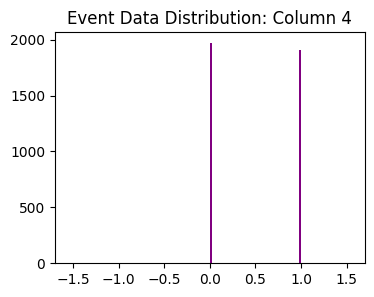

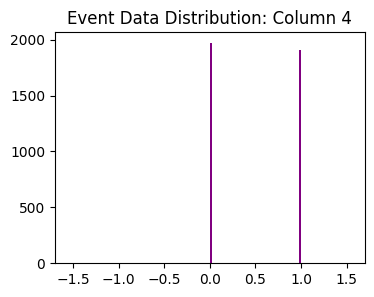

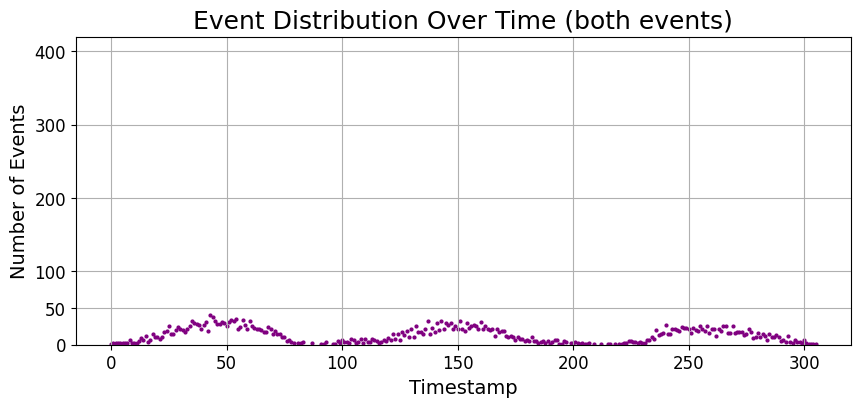

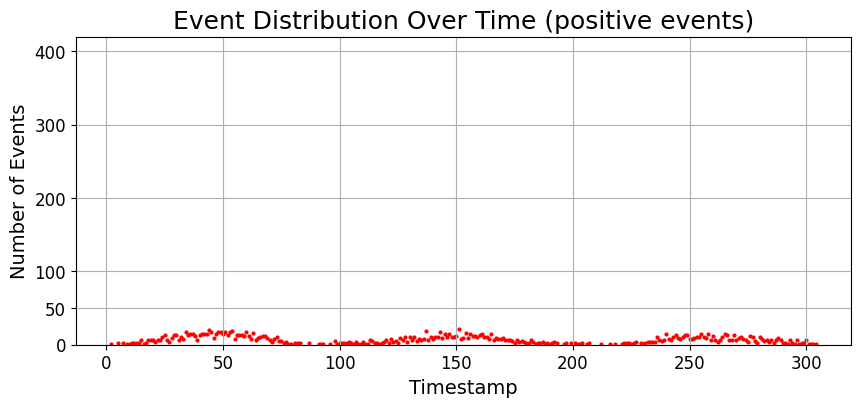

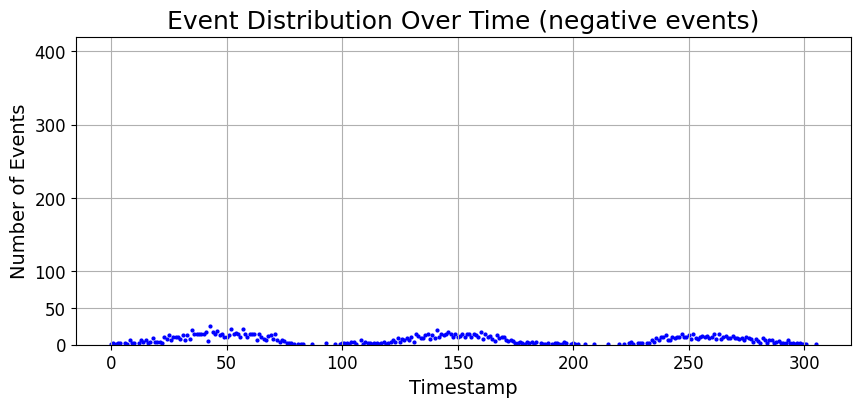

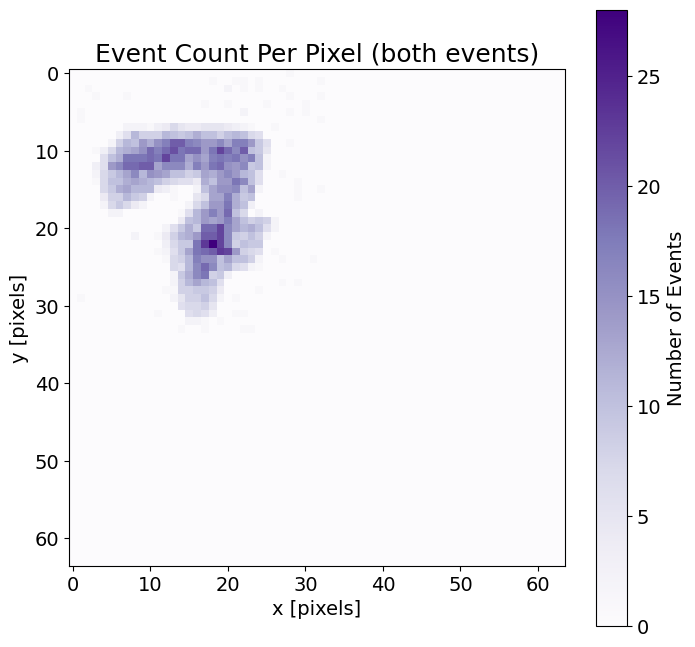

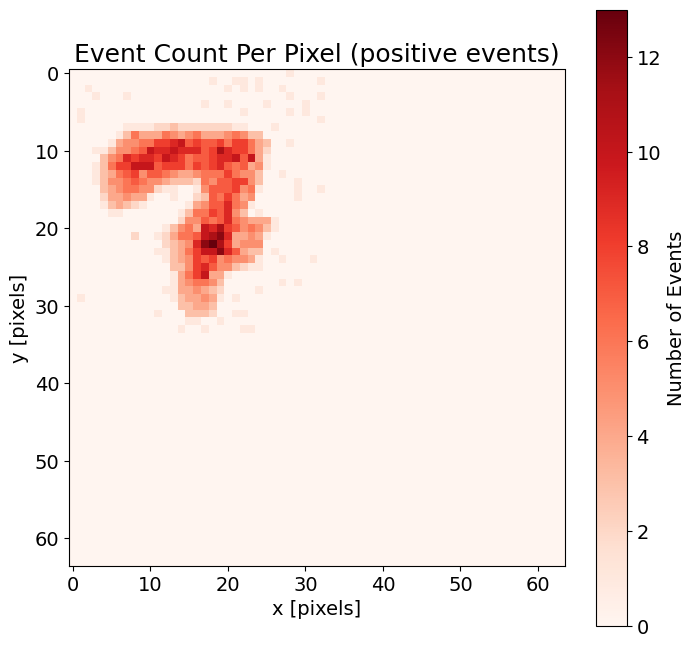

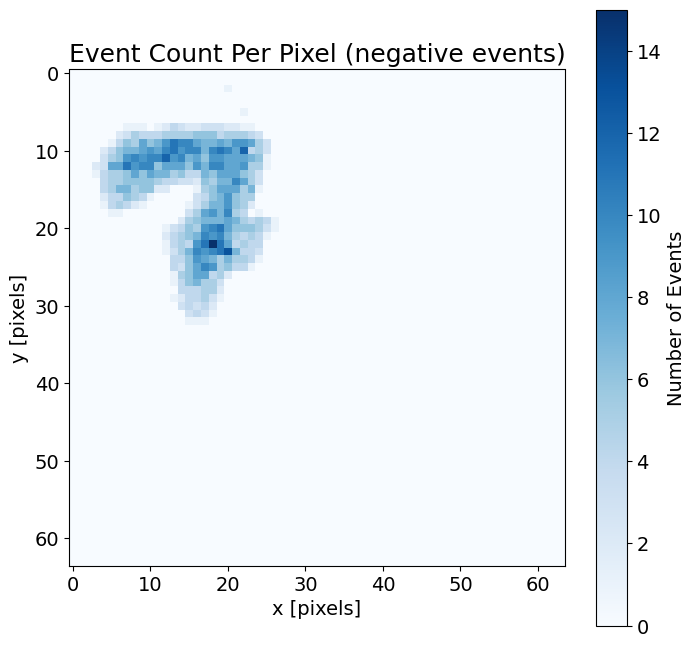

共有 289 个不同的时间戳


In [4]:
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
from matplotlib import colors
import matplotlib.pyplot as plt

print(events.shape)
num_events, num_attributes = events.shape
print(f"Total Events: {num_events}, Attributes per Event: {num_attributes}")
print()
print("First Event:")
print(events[0])
print(f"Timestamp: {events[0][0]:.10f}")
print(f"x: {events[0][1]}")
print(f"y: {events[0][2]}")
print(f"Polarity: {events[0][3]}")

# 给每个列指定不同的颜色
colors = ['skyblue', 'salmon', 'limegreen', 'purple']  # 您可以根据需要调整颜色列表

# 绘制每一列的直方图
for i in range(events.shape[1]):
    plt.figure(figsize=(4, 3))
    plt.hist(events[:, i], bins=50, color=colors[i % len(colors)])  # 根据列数循环使用颜色
    plt.title(f'Event Data Distribution: Column {i+1}')
    plt.show()
    
plt.figure(figsize=(4, 3))
plt.hist(events[:, 3], bins=50, color=colors[i % len(colors)])  # 根据列数循环使用颜色
plt.xlim([-1.7, 1.7])  # 设置x轴范围为 -1.5 到 1.5
plt.title(f'Event Data Distribution: Column {3+1}')
plt.show()

plt.figure(figsize=(4, 3))
# 设置 rwidth 参数为 1.65 以增加条形的宽度
plt.hist(events[:, 3], bins=50, color=colors[3 % len(colors)], rwidth=1.4)
plt.xlim([-1.7, 1.7])  # 设置x轴范围
plt.title(f'Event Data Distribution: Column {3+1}')
plt.show()



def custom_yaxis_scale(y, pos):
    """
    自定义的y轴刻度函数，拉伸0-100的范围
    """
    if y <= 100:
        return f'{y:.0f}'  # 保持0-100的正常刻度显示
    else:
        return f'{y:.0f}'  # 超过100后保持默认显示

def analyze_event_distribution(events, polarity_filter='both'):
    """
    分析事件在时间轴上的分布并使用固定的颜色。
    
    参数:
    - events: 事件数据，包含[timestamp, x, y, polarity]。
    - polarity_filter: 极性过滤器，可选 'both'（默认值），'positive' 或 'negative'。
    
    返回:
    - event_counts: 每个时间戳上发生的事件数量。
    """
    # 根据极性过滤条件筛选事件
    if polarity_filter == 'both':
        filtered_events = events
        color = 'purple'  # 使用固定颜色紫色
    elif polarity_filter == 'positive':
        filtered_events = events[events[:, 3] > 0]
        color = 'red'  # 使用固定颜色红色
    elif polarity_filter == 'negative':
        filtered_events = events[events[:, 3] <= 0]
        color = 'blue'  # 使用固定颜色蓝色

    timestamps = filtered_events[:, 0]
    unique_timestamps, event_counts = np.unique(timestamps, return_counts=True)
    
    plt.figure(figsize=(10, 4))  # 调整 figsize，减小高度
    
    # 设置背景颜色为白色
    ax = plt.gca()
    ax.set_facecolor('white')

    # 使用固定颜色绘制散点图
    scatter = plt.scatter(unique_timestamps, event_counts, color=color, s=4)
    plt.title(f'Event Distribution Over Time ({polarity_filter} events)', fontsize=18)  # 设置标题字体大小
    plt.xlabel('Timestamp', fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel('Number of Events', fontsize=14)  # 设置y轴标签字体大小
    
    # 设置y轴自定义刻度
    plt.ylim(0, 420)
    
    # 使用自定义的Y轴刻度格式化器
    ax.yaxis.set_major_formatter(FuncFormatter(custom_yaxis_scale))
    
    plt.xticks(fontsize=12)  # 设置x轴刻度字体大小
    plt.yticks([0, 50, 100, 200, 300, 400], fontsize=12)  # 设置自定义y轴刻度
    plt.grid(True)

    plt.show()
    
    return event_counts


def analyze_pixel_event_distribution(events, img_size=(64, 64), polarity_filter='both'):
    """
    分析每个像素点上的事件数量并生成对应的图像。

    参数:
    - events: 事件数据，包含[timestamp, x, y, polarity]。
    - img_size: 输出图像的大小，默认为(512, 512)。
    - polarity_filter: 极性过滤器，可选 'both'（默认值），'positive' 或 'negative'。

    返回:
    - pixel_event_counts: 每个像素点上的事件数量。
    """
    pixel_event_counts = np.zeros(img_size, dtype=int)

    for event in events:
        ts, x, y, p = event
        
        # 根据极性过滤条件进行统计
        if polarity_filter == 'both' or (polarity_filter == 'positive' and p > 0) or (polarity_filter == 'negative' and p <= 0):
            pixel_event_counts[int(y), int(x)] += 1

    # 根据极性选择不同的颜色映射
    if polarity_filter == 'both':
        cmap = 'Purples'
    elif polarity_filter == 'positive':
        cmap = 'Reds'
    elif polarity_filter == 'negative':
        cmap = 'Blues'

    # 生成图像
    plt.figure(figsize=(8, 8))
    plt.imshow(pixel_event_counts, cmap=cmap)
    plt.title(f'Event Count Per Pixel ({polarity_filter} events)', fontsize=18)  # 设置标题字体大小
    plt.xlabel("x [pixels]", fontsize=14)  # 设置x轴标签字体大小
    plt.ylabel("y [pixels]", fontsize=14)  # 设置y轴标签字体大小
    cbar = plt.colorbar(label='Number of Events')
    cbar.ax.tick_params(labelsize=14)  # 设置颜色条刻度字体大小
    cbar.set_label('Number of Events', fontsize=14)  # 设置颜色条标签字体大小
    plt.xticks(fontsize=14)  # 设置x轴刻度标签字体大小
    plt.yticks(fontsize=14)  # 设置y轴刻度标签字体大小
    plt.show()

    return pixel_event_counts

both_event_counts = analyze_event_distribution(events, 'both')
both_event_counts = analyze_event_distribution(events, 'positive')
both_event_counts = analyze_event_distribution(events, 'negative')

both_pixel_event_counts = analyze_pixel_event_distribution(events, polarity_filter='both')
pos_pixel_event_counts = analyze_pixel_event_distribution(events, polarity_filter='positive')
neg_pixel_event_counts = analyze_pixel_event_distribution(events, polarity_filter='negative')

def count_unique_timestamps(events):
    """
    计算事件数据中独特时间戳的数量。

    参数:
    - events: 事件数据，包含 [timestamp, x, y, polarity] 的数组。

    返回:
    - unique_timestamps_count: 独特时间戳的数量。
    - unique_timestamps: 独特的时间戳数组。
    """
    # 获取所有时间戳
    timestamps = events[:, 0]
    
    # 找出所有独特的时间戳
    unique_timestamps = np.unique(timestamps)
    
    # 计算独特时间戳的数量
    unique_timestamps_count = len(unique_timestamps)
    
    return unique_timestamps_count, unique_timestamps
unique_timestamps_count, unique_timestamps = count_unique_timestamps(events)
print(f"共有 {unique_timestamps_count} 个不同的时间戳")
